# Olympics Games from 1896 till 2012

In [1]:
import pandas as pd

In [2]:
ls

Untitled.ipynb                sales/
Untitled1.ipynb               sales-feb-2015.csv
all_medalists.csv             sales.csv
gapminder_tidy.csv            sales.zip
pennsylvania2012_turnout.csv  titanic.csv
pittsburgh2013.csv            users.csv


In [3]:
medals = pd.read_csv('all_medalists.csv')

In [4]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [5]:
medals.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

In [6]:
medals.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze


In [7]:
country_names = medals.NOC

In [8]:
# of medals won by each country
medal_counts = country_names.value_counts()

In [9]:
medal_counts

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
CAN     592
NOR     537
POL     499
DEN     491
FRG     490
KOR     466
FIN     451
YUG     435
BEL     408
CUB     395
ESP     377
SUI     376
BRA     372
BUL     331
TCH     329
       ... 
VIE       2
TJK       2
MOZ       2
KSA       2
ZAM       2
LUX       2
SRI       2
ECU       2
TAN       2
SUR       2
ISV       1
UAE       1
SEN       1
TGA       1
BER       1
MRI       1
CIV       1
KUW       1
MKD       1
GUY       1
NIG       1
SUD       1
BDI       1
ERI       1
AHO       1
TOG       1
AFG       1
DJI       1
IRQ       1
BAR       1
Name: NOC, Length: 138, dtype: int64

In [10]:
'''
Rather than ranking countries by total medals won and showing that list,
I want to see more detail. I can use a pivot table to compute how many separate bronze, silver and gold medals each country won. 
That pivot table can then be used to repeat the previous computation to rank by total medals won.'''

'\nRather than ranking countries by total medals won and showing that list,\nI want to see more detail. I can use a pivot table to compute how many separate bronze, silver and gold medals each country won. \nThat pivot table can then be used to repeat the previous computation to rank by total medals won.'

In [11]:
counted = medals.pivot_table(index='NOC',values='Athlete',columns='Medal',aggfunc='count')

In [12]:
counted.head(9)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0
ARM,7.0,1.0,1.0
AUS,413.0,293.0,369.0
AUT,44.0,21.0,81.0
AZE,9.0,4.0,3.0


In [13]:
counted['Total_medals'] = counted.sum(axis='columns')

In [14]:
counted.head(9)

Medal,Bronze,Gold,Silver,Total_medals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0
ARM,7.0,1.0,1.0,9.0
AUS,413.0,293.0,369.0,1075.0
AUT,44.0,21.0,81.0,146.0
AZE,9.0,4.0,3.0,16.0


In [16]:
counted = counted.sort_values('Total_medals', ascending=False)

In [17]:
counted.head(9)

Medal,Bronze,Gold,Silver,Total_medals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


In [19]:
medals.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze


In [20]:
'''What could be the difference between the 'Event_gender' and 'Gender' columns? 
let's whether i can evaluate it by looking at the unique values of the pairs (Event_gender, Gender) in the data or not.
there can be something like (Event_gender='M', Gender='Women'). 
However, i m sure i can see that, strangely enough, 
if there is, there alsp can be an observation with (Event_gender='W', Gender='Men').
'''

"What could be the difference between the 'Event_gender' and 'Gender' columns? \nlet's whether i can evaluate it by looking at the unique values of the pairs (Event_gender, Gender) in the data or not.\nthere can be something like (Event_gender='M', Gender='Women'). \nHowever, i m sure i can see that, strangely enough, \nif there is, there alsp can be an observation with (Event_gender='W', Gender='Men').\n"

In [21]:
ev_gen = medals[['Event_gender','Gender']]

In [24]:
ev_gen.head(9)

,Event_gender,Gender
0,M,Men
1,M,Men
2,M,Men
3,M,Men
4,M,Men
5,M,Men
6,M,Men
7,M,Men
8,M,Men


In [23]:
ev_gen_uniques = ev_gen.drop_duplicates()

In [25]:
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


In [26]:
#now let's use .groupby() to continue our exploration. 
#our job is to group by 'Event_gender' and 'Gender' and count the rows.

In [27]:
medals_by_gender = medals.groupby(['Event_gender','Gender'])

In [28]:
medals_by_gender.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
348,Paris,1900,Equestrian,Jumping,"VAN DE POELE, Georges",BEL,Men,high jump,X,Bronze


In [29]:
medal_count_by_gender = medals_by_gender.count()

In [30]:
medal_count_by_gender.head(9)

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

In [31]:
#one men in women event? let's dive more into it

In [32]:
suspicious = (medals.Event_gender=='W')&(medals.Gender=='Men')

In [34]:
suspect = medals[(medals.Event_gender=='W')&(medals.Gender == 'Men')]

In [35]:
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


In [36]:
suspect.Athlete

23675    CHEPCHUMBA, Joyce
Name: Athlete, dtype: object

In [37]:
#according to the data above, Joyce Chepchumba was a man that won a medal in a women's event.
#That is a data error as we can confirm with a web search, which I already did :) .


In [38]:
'''
Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War 
between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). 
let's dive into this area to aggregate the number of distinct sports in which the USA and the USSR won 
medals during the Cold War years.
'''

"\nCounting USA vs. USSR Cold War Olympic Sports\n\nThe Olympic competitions between 1952 and 1988 took place during the height of the Cold War \nbetween the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). \nlet's dive into this area to aggregate the number of distinct sports in which the USA and the USSR won \nmedals during the Cold War years.\n"

In [40]:
# extracting all rows which 'Edition' is between 1952 & 1988 during the cold war war
during_cold_war = (medals['Edition'] <= 1952) & (medals['Edition'] <= 1988)

In [46]:
during_cold_war.head(9)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
Name: Edition, dtype: bool

In [43]:
is_usa_urs = medals.NOC.isin(['USA','URS'])

In [47]:
is_usa_urs.head(9)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: NOC, dtype: bool

In [48]:
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [49]:
cold_war_medals.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver


In [50]:
country_grouped = cold_war_medals.groupby('NOC')

In [51]:
country_grouped.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver
8114,Helsinki,1952,Athletics,Athletics,"ANUFRIYEV, Aleksandr",URS,Men,10000m,M,Bronze


In [54]:
Nsports = country_grouped['Sport'].nunique()

In [55]:
Nsports.sort_values(ascending=False)

NOC
USA    28
URS     9
Name: Sport, dtype: int64

In [ ]:
#the USA or USSR, won the most medals consistently over the Cold War period

In [57]:
'''I need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns.
The entries will be the total number of medals each country won that year.
If the country won no medals in a given edition, expecting a NaN in that entry of the pivot table.
then need to slice the Cold War period and subset the 'USA' and 'URS' columns.'''

"I need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns.\nThe entries will be the total number of medals each country won that year.\nIf the country won no medals in a given edition, expecting a NaN in that entry of the pivot table.\nthen need to slice the Cold War period and subset the 'USA' and 'URS' columns."

In [58]:
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC',
                                          values='Athlete', aggfunc='count')

In [60]:
medals_won_by_country.head(9)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,NaN,NaN,NaN,NaN,11.0,NaN,10.0,4.0,NaN,NaN,...,NaN,22.0,198.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1928,NaN,NaN,NaN,NaN,32.0,NaN,4.0,4.0,NaN,NaN,...,NaN,22.0,84.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,NaN,NaN,...,NaN,1.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

In [63]:
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

In [66]:
most_medals
#during the cold war

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [67]:
most_medals.value_counts()
#during the cold war

URS    8
USA    2
dtype: int64

In [68]:
#time to visualize

In [79]:
usa_df = medals[medals.NOC=='USA']

In [80]:
usa_df.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver


In [81]:
usa_df_medals_by_year = usa_df.groupby(['Edition','Medal'])

In [82]:
usa_df_medals_by_year.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver
31,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,high jump,M,Silver


In [83]:
usa_df_medals_by_year = usa_df_medals_by_year['Athlete'].count()

In [85]:
usa_df_medals_by_year.head()

Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
Name: Athlete, dtype: int64

In [86]:
usa_df_medals_by_year = usa_df_medals_by_year.unstack(level='Medal')

In [88]:
usa_df_medals_by_year.head()

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25


In [90]:
import matplotlib.pyplot as plt

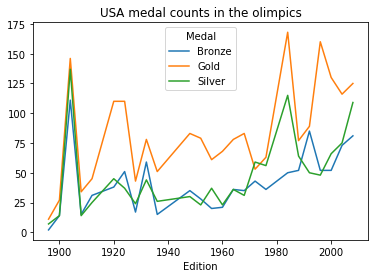

In [93]:
usa_df_medals_by_year.plot(title='USA medal counts in the olimpics')

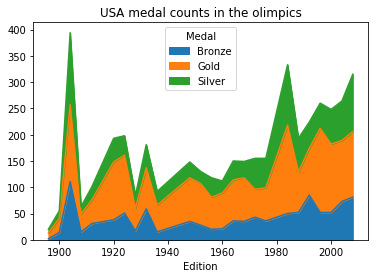

In [94]:
#let us plot by area
usa_df_medals_by_year.plot.area(title='USA medal counts in the olimpics')

In [95]:
#this time area plot for ordered medals

In [96]:
medals.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

In [98]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [99]:
medals.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze


In [100]:
#need to redefine 'Medal' as ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal,
                              categories=['Bronze','Silver','Gold'],
                             ordered=True)

In [101]:
medals.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze


In [105]:
#recreate usa_df as usa_df2
usa_df2 = medals[medals.NOC=='USA']

In [106]:
usa_df2.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver


In [107]:
#recreate usa_df_medals_by_year as usa_df_medals_by_year2
usa_df_medals_by_year2 = usa_df2.groupby(['Edition','Medal'])

In [108]:
usa_df_medals_by_year2.head(9)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
22,Athens,1896,Athletics,Athletics,"JAMISON, Herbert",USA,Men,400m,M,Silver
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
30,Athens,1896,Athletics,Athletics,"CONNOLLY, James",USA,Men,high jump,M,Silver
31,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,high jump,M,Silver


In [109]:
usa_df_medals_by_year2 = usa_df_medals_by_year2.Athlete.count()

In [110]:
usa_df_medals_by_year2.head(9)

Edition  Medal 
1896     Bronze      2
         Silver      7
         Gold       11
1900     Bronze     14
         Silver     14
         Gold       27
1904     Bronze    111
         Silver    137
         Gold      146
Name: Athlete, dtype: int64

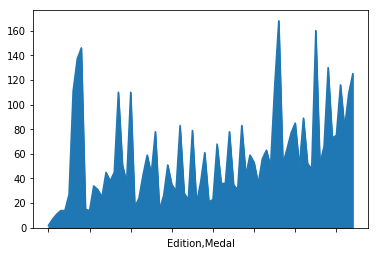

In [111]:
usa_df_medals_by_year2.plot.area()

In [114]:
#the plot above is not as expected!!!! let's unstack it then let's see

In [112]:
usa_df_medals_by_year2 = usa_df_medals_by_year2.unstack(level='Medal')

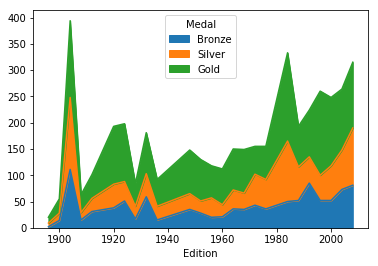

In [113]:
usa_df_medals_by_year2.plot.area()